# 🫀 Prediksi Resiko Stroke Berdasarkan Gejala
## 📌 Latar Belakang
Stroke adalah salah satu penyebab utama kematian dan kecacatan di seluruh dunia. Deteksi dini terhadap risiko stroke sangat penting untuk pencegahan dan penanganan cepat. Gejala-gejala seperti nyeri dada, sesak napas, detak jantung tidak teratur, dan tekanan darah tinggi merupakan indikator penting yang dapat digunakan untuk memprediksi risiko stroke seseorang. Dengan menggunakan teknik machine learning, kita dapat membangun model prediksi berbasis gejala untuk mengidentifikasi individu yang berisiko lebih tinggi mengalami stroke.

Link dataset: [Stroke Risk Prediction Dataset Based on Symptoms](https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset)

# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load Dataset

In [2]:
# Memuat Dataset
df = pd.read_csv('/content/stroke_risk_dataset.csv')
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

Tidak terdapat nilai null pada dataset.

In [4]:
df.describe(include='all')

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


# Data Cleaning

Cek baris duplikat

In [5]:
print('Jumlah baris duplikat: ', df.duplicated().sum())

Jumlah baris duplikat:  1021


In [6]:
# Menghapus baris duplikat
clean_df = df.drop_duplicates()

## Melihat outlier pada kolom Age dan Stroke Risk

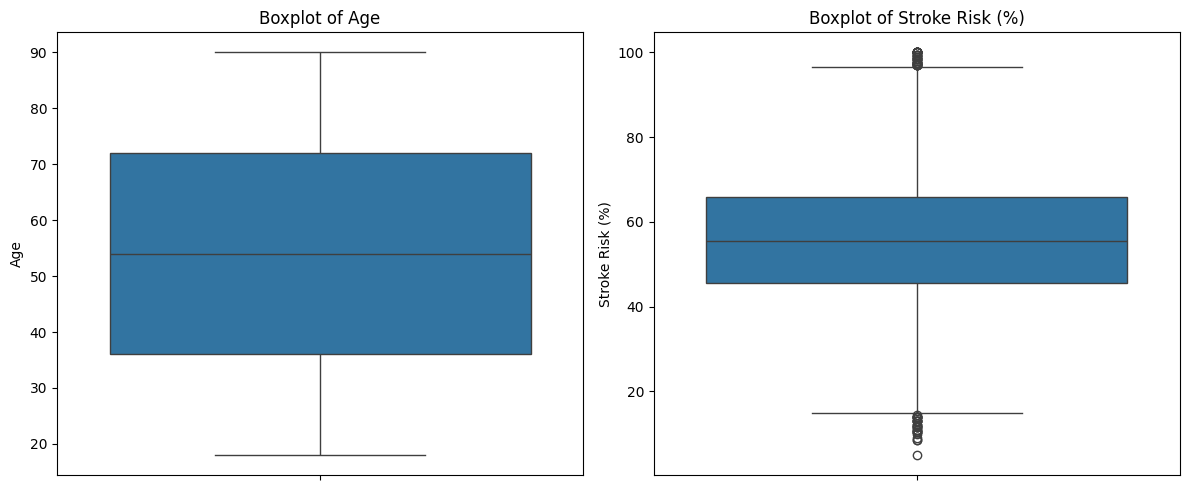

Jumlah outlier pada kolom Age: 0
Empty DataFrame
Columns: [Age]
Index: []
Jumlah outlier pada kolom Stroke Risk (%): 70
       Stroke Risk (%)
2498             100.0
6423              98.5
8544              98.0
8772             100.0
8962              97.5
...                ...
58128             97.0
61361             13.0
64253             13.0
65189             99.5
68195             11.5

[70 rows x 1 columns]


In [7]:
# Fokus hanya ke kolom Age dan Stroke Risk
num_cols = ['Age', 'Stroke Risk (%)']

# Membuat boxplot untuk Age dan Stroke Risk
plt.figure(figsize=(12, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=clean_df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Menghitung outlier berdasarkan IQR
for col in num_cols:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = clean_df[(clean_df[col] < lower_bound) | (clean_df[col] > upper_bound)]

    print("=================================================")
    print(f"Jumlah outlier pada kolom {col}: {len(outliers)}")
    print(outliers[[col]])

Outlier pada konteks Stroke Risk tidak dihapus karena ini bukan data "error" secara medis.

# EDA

## Melihat distribusi Kolom Numerik Bukan Binary

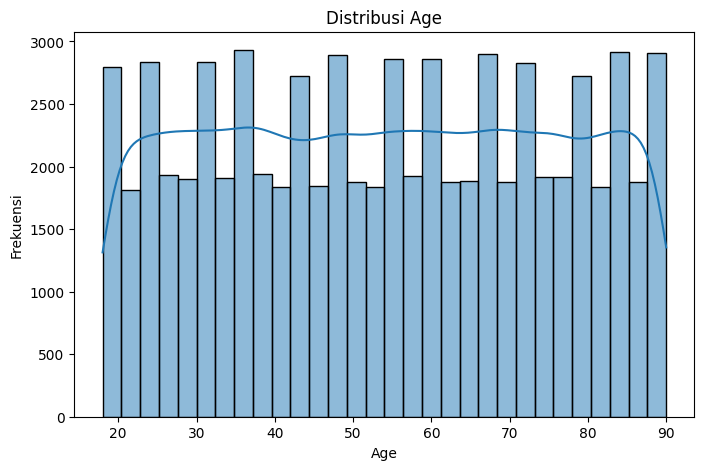

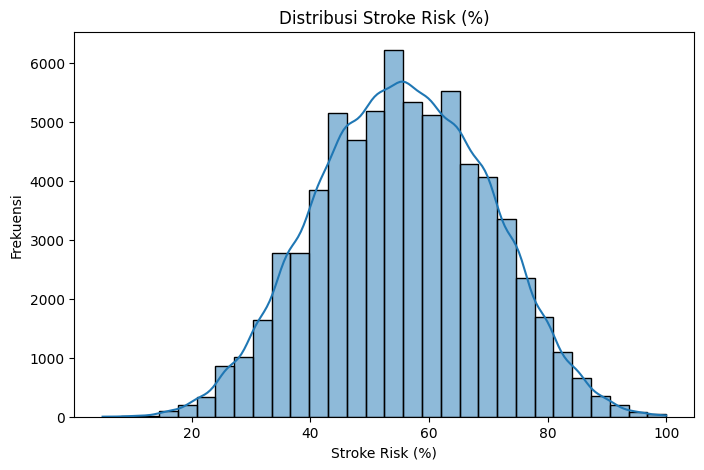

In [8]:
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(clean_df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

- Sebaran usia terlihat cukup merata dari umur sekitar 18 tahun sampai 90 tahun. Garis biru (KDE, Kernel Density Estimate) juga menunjukkan tidak ada lonjakan besar di usia tertentu, konsisten menggambarkan sebaran yang relatif rata.
- Distribusi Stroke Risk memiliki distribusi normal.

## Melihat distribusi tiap fitur dengan nilai binary (0 dan 1)

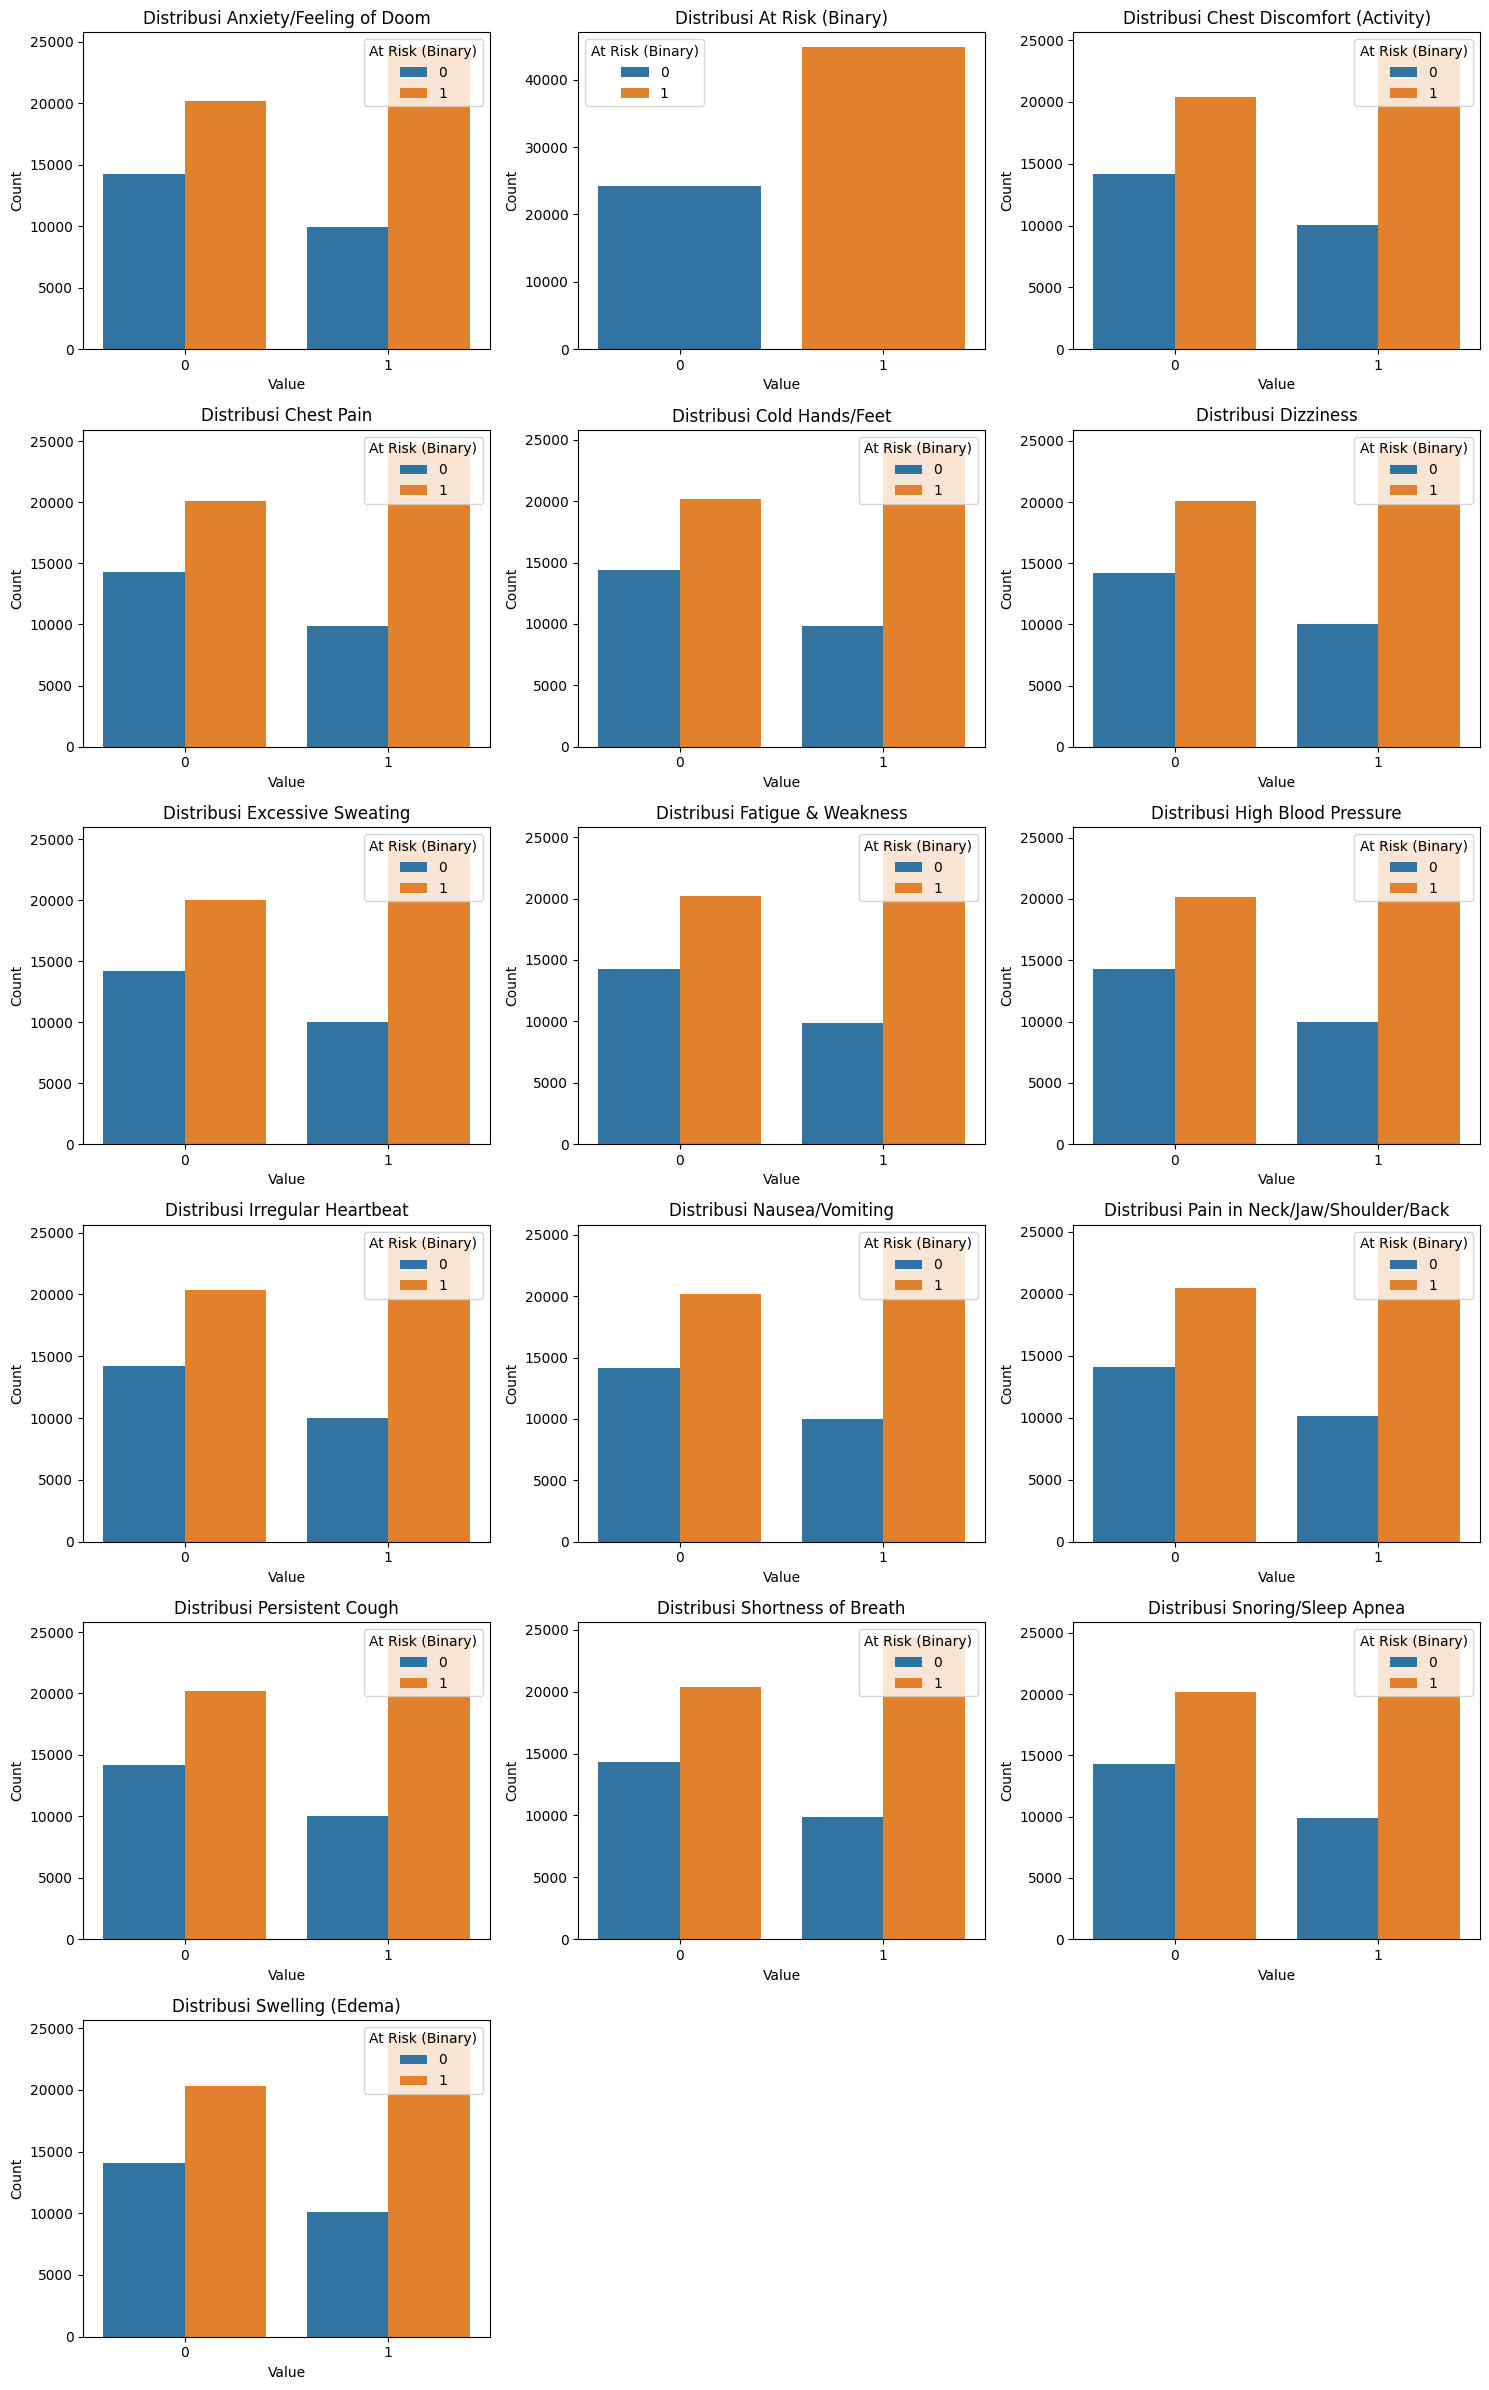

In [9]:
# Daftar kolom binary (semua kolom selain Age dan Stroke Risk)
binary_cols = clean_df.columns.difference(num_cols)

# Membuat subplot grid
n_cols = 3  # berapa banyak grafik per baris
n_rows = (len(binary_cols) + n_cols - 1) // n_cols  # menghitung jumlah baris

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(binary_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=clean_df, x=col, hue="At Risk (Binary)")
    plt.title(f'Distribusi {col}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['0', '1'])

plt.tight_layout()
plt.show()

Kolom "At Risk (Binary)" merupakan label klasifikasi yang menentukan apakah seseorang berisiko terkena stroke atau tidak berdasarkan berbagai faktor klinis dan gejala.
Meskipun distribusi kelas menunjukkan sedikit ketidakseimbangan, namun proporsinya masih dapat diterima untuk melatih model klasifikasi tanpa perlakuan khusus balancing di tahap awal.
Evaluasi model nantinya akan menggunakan metrik yang sensitif terhadap ketidakseimbangan kelas seperti Precision, Recall, dan F1-Score.

## Stroke Risk Vs Age

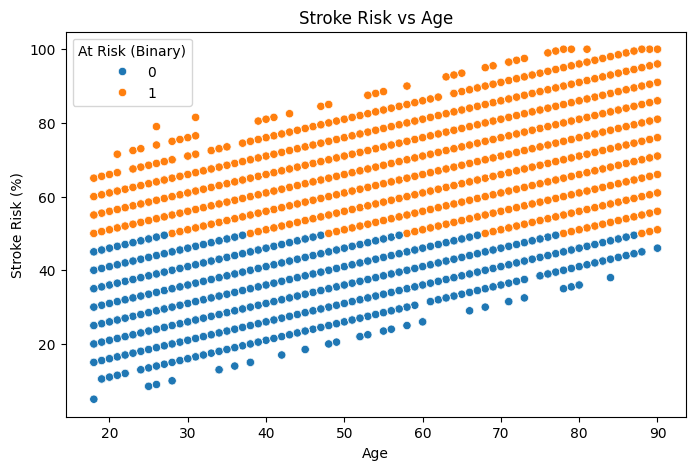

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=clean_df['Age'], y=clean_df['Stroke Risk (%)'], hue=clean_df['At Risk (Binary)'])
plt.title('Stroke Risk vs Age')
plt.xlabel('Age')
plt.ylabel('Stroke Risk (%)')
plt.show()

Dapat dilihat dari visualisasi dengan scatter plot bahwa semakin tua usia seseorang maka persentase resiko terkena stroke juga semakin tinggi. Persentase terkena stroke diatas 50% dapat dikategorikan sebagai 'At Risk' atau Beresiko Stroke.

## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

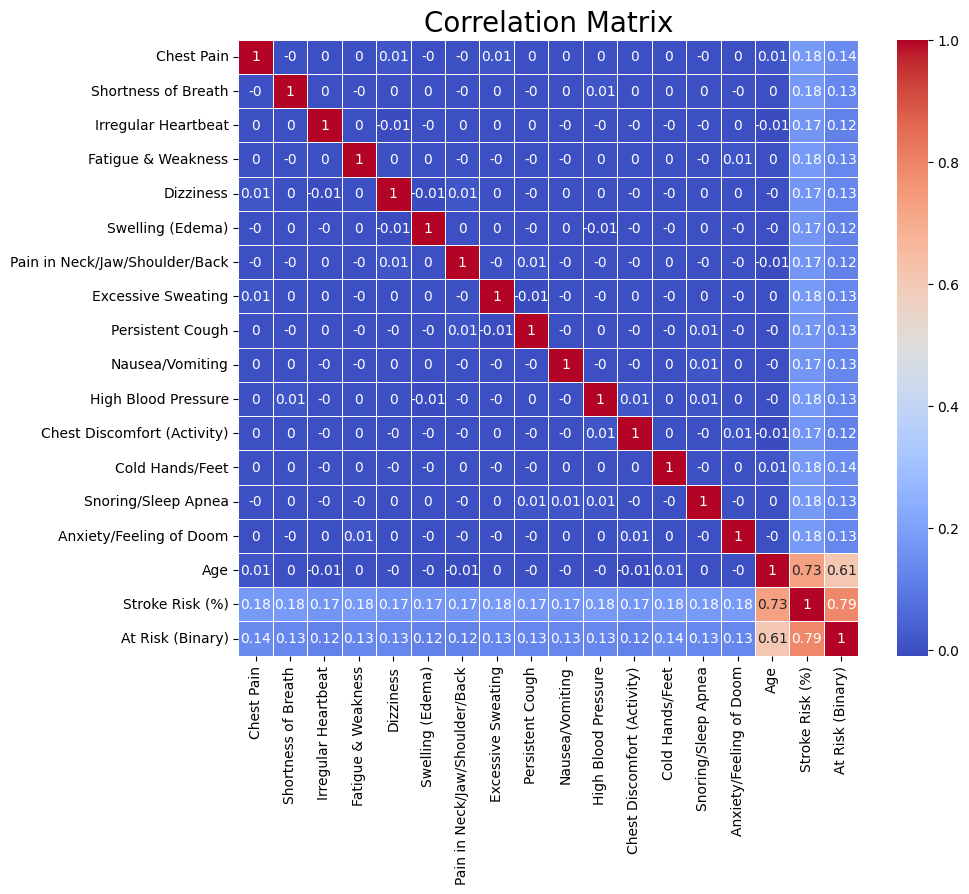

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = clean_df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix", size=20)

1. Kebanyakan korelasi mendekati 0:
Hampir semua nilai korelasi antar fitur (seperti Chest Pain, Shortness of Breath, Irregular Heartbeat, dst.) dengan Stroke Risk (%) itu kecil, sekitar -0.18 sampai +0.18.
Artinya: hubungan antara gejala-gejala itu dengan Stroke Risk (%) sangat lemah atau hampir tidak berhubungan secara linear.

2. Korelasi tinggi hanya di Age:
Age (Umur) terhadap Stroke Risk (%) korelasinya 0.73 → ini korelasi kuat dan positif.
Artinya: semakin bertambah usia, rata-rata risiko stroke meningkat secara signifikan.
Ini masuk akal karena umur memang faktor risiko besar untuk stroke.

3. Hubungan Stroke Risk (%) dengan At Risk (Binary):
Korelasi antara Stroke Risk (%) dengan At Risk (Binary) sebesar 0.79 → sangat kuat.
Artinya: semakin besar Stroke Risk (%), semakin besar kemungkinan seseorang dikategorikan "At Risk" (berisiko terkena stroke).

4. Hubungan antar gejala (symptoms) satu sama lain:
Hampir semua kombinasi antar-gejala juga korelasinya mendekati 0. Ini berarti: Misalnya, orang yang punya Chest Pain belum tentu mengalami Shortness of Breath. Gejala-gejala ini terdistribusi secara independen.

# Data Splitting

In [12]:
# Fitur dan target
X = clean_df.drop(columns=['At Risk (Binary)', 'Stroke Risk (%)'])
y = clean_df['At Risk (Binary)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi

In [13]:
# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling

In [14]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
                      columns=['Logistic Regression', 'Random Forest', 'XGBoost'])

In [15]:
# Definisikan setiap model klasifikasi secara terpisah
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train_scaled, y_train)
nb = GaussianNB().fit(X_train, y_train)
lr = LogisticRegression().fit(X_train_scaled, y_train)
xgb = XGBClassifier().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


## Evaluasi Model

In [16]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    return results

In [17]:
# Evaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test_scaled, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test),
    'Logistic Regression': evaluate_model(lr, X_test_scaled, y_test),
    'XGBoost': evaluate_model(xgb, X_test, y_test)
}

In [18]:
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

In [19]:
# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
        'ROC AUC': metrics['ROC AUC']
    })

In [20]:
# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame Metriks Evaluasi
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score  \
0            Random Forest (RF)  0.947956   0.953440  0.967065  0.960204   
1  Support Vector Machine (SVM)  0.990287   0.991313  0.993748  0.992529   
2              Naive Bayes (NB)  0.922296   0.930639  0.951211  0.940813   
3           Logistic Regression  1.000000   1.000000  1.000000  1.000000   
4                       XGBoost  0.996738   0.996435  0.998549  0.997491   

    ROC AUC  
0  0.939825  
1  0.988814  
2  0.909993  
3  1.000000  
4  0.995968  


- Logistic Regression: Menunjukkan kinerja yang sempurna dengan Accuracy, Precision, Recall, F1-Score, dan ROC AUC sebesar 1.000000. Ini mengindikasikan bahwa model Logistic Regression mampu mengklasifikasikan risiko stroke dengan benar untuk semua sampel uji.

- XGBoost: Menunjukkan kinerja yang sangat tinggi dengan Accuracy (0.996738), Precision (0.996435), Recall (0.998549), F1-Score (0.997491), dan ROC AUC (0.995968). Model ini hampir sempurna dalam memprediksi risiko stroke, dengan tingkat kesalahan yang sangat rendah. Recall yang sangat tinggi menunjukkan bahwa model sangat baik dalam mengidentifikasi hampir semua pasien yang sebenarnya berisiko stroke.

- Support Vector Machine (SVM): Juga menunjukkan kinerja yang sangat baik dengan Accuracy (0.990287), Precision (0.991313), Recall (0.993748), dan F1-Score (0.992529), serta ROC AUC (0.988814). SVM mampu memprediksi risiko stroke dengan tingkat akurasi, presisi, dan recall yang tinggi.

- Random Forest (RF): Menunjukkan kinerja yang baik dengan Accuracy (0.945419), Precision (0.951762), Recall (0.964832), F1-Score (0.958252), dan ROC AUC (0.937159). Meskipun tidak sebaik tiga model di atasnya, Random Forest masih memberikan hasil yang cukup solid dalam memprediksi risiko stroke. Recall yang cukup tinggi menunjukkan kemampuannya dalam mengidentifikasi sebagian besar pasien berisiko.

- Naive Bayes (NB): Menunjukkan kinerja yang paling rendah di antara model-model yang dievaluasi, dengan Accuracy (0.922296), Precision (0.930639), Recall (0.951211), F1-Score (0.940813), dan ROC AUC (0.909993). Meskipun demikian, recall yang masih cukup tinggi menunjukkan bahwa model ini masih cukup baik dalam mengidentifikasi pasien yang berisiko stroke, meskipun dengan precision yang sedikit lebih rendah dibandingkan model lainnya.

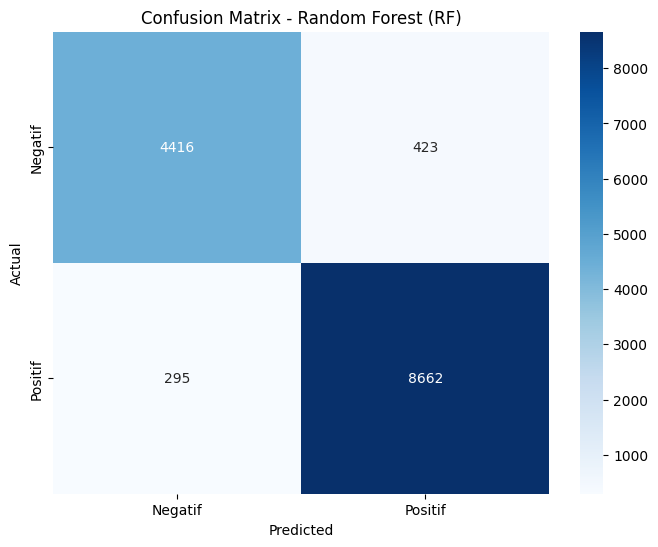

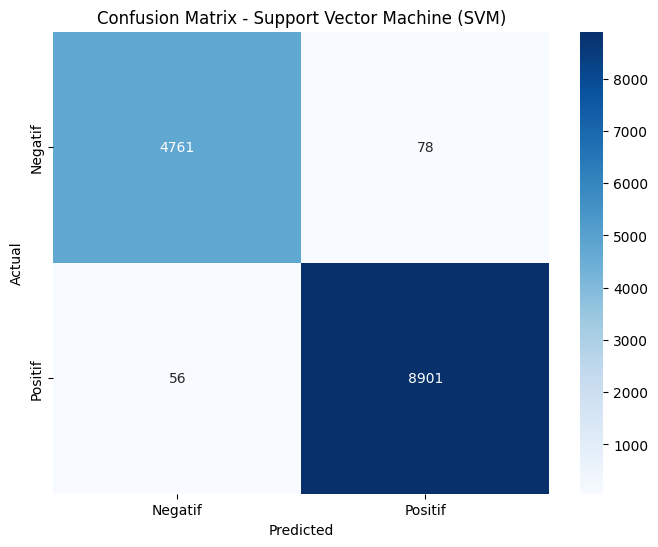

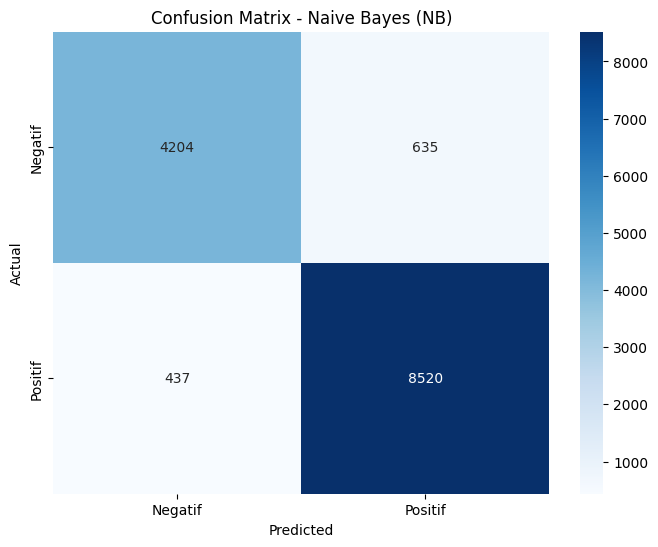

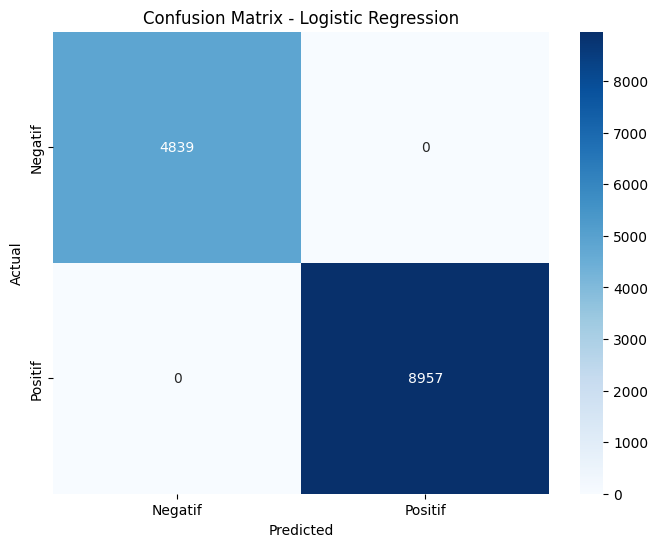

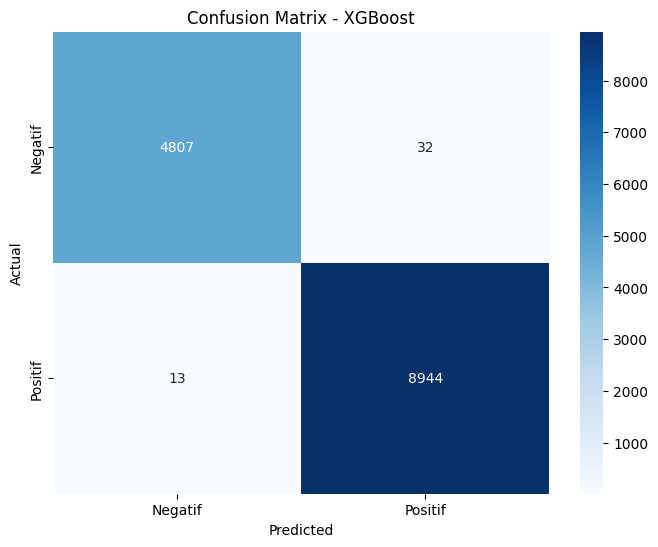

In [21]:
# Membuat visualisasi heatmap untuk setiap confusion matrix
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Kesimpulan
Model Logistic Regression, XGBoost, dan Support Vector Machine (SVM) menunjukkan kinerja yang sangat menjanjikan untuk memprediksi risiko stroke berdasarkan gejala.